In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_theme()

In [10]:
raw_data = pd.read_csv(r'data/1.04.+Real-life+example.csv')

In [13]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [35]:
raw_data.drop(['Model'], axis=1, inplace=True)

In [65]:
raw_data.dropna(axis=0, inplace=True)

In [66]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [59]:
q = raw_data['Price'].quantile(0.95)
price_data = raw_data[raw_data['Price'] < q]
price_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3784,3784.000000,3784,3784.000000,3784.000000,3784,3784,3784.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,859,NaN,1474,NaN,NaN,1713,3416,NaN
mean,NaN,14995.943224,NaN,167.586945,2.719027,NaN,NaN,2006.034091
std,NaN,12208.954809,NaN,93.098491,5.077864,NaN,NaN,6.488661
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10982.105000,NaN,161.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19425.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


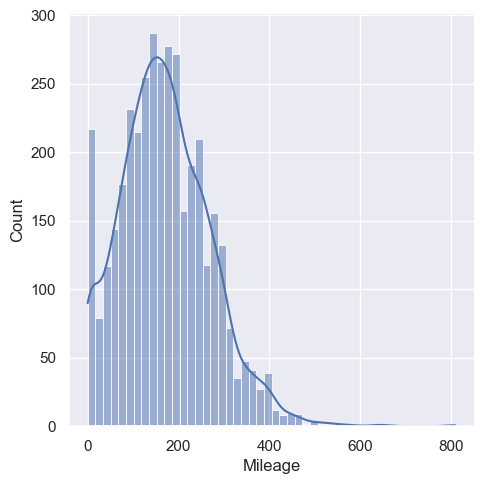

In [102]:
sns.displot(price_data['Mileage'], kde=True)
q = price_data['Mileage'].quantile(0.99)
mileage_data = price_data[price_data['Mileage'] < q]
mileage_data.describe(include='all')

In [78]:
q = mileage_data['Year'].quantile(0.01)
year_data = mileage_data[mileage_data['Year'] > q]
year_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3730,3730.000000,3730,3730.000000,3730.000000,3730,3730,3730.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,845,NaN,1442,NaN,NaN,1702,3362,NaN
mean,NaN,15166.222335,NaN,166.913941,2.730214,NaN,NaN,2006.343700
std,NaN,12201.539962,NaN,92.638667,5.113337,NaN,NaN,5.986383
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11000.000000,NaN,160.500000,2.200000,NaN,NaN,2007.000000
75%,NaN,19600.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [87]:
engine_data = year_data[year_data['EngineV'] < 6.5]
engine_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


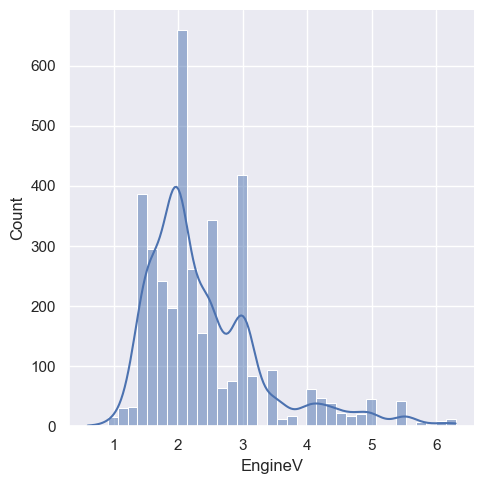

In [89]:
sns.displot(engine_data['EngineV'], kde=True)

In [93]:
engine_data.reset_index(drop=True, inplace=True)

In [95]:
cleaned_data = engine_data.copy()

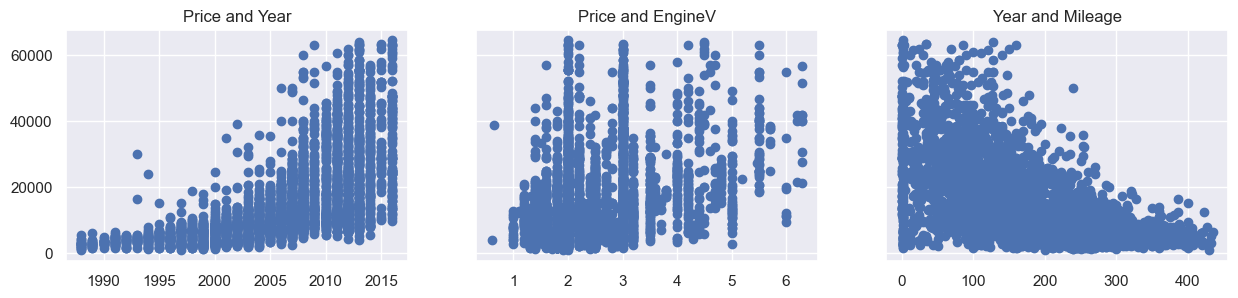

In [104]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(cleaned_data['Year'], cleaned_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['EngineV'], cleaned_data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cleaned_data['Mileage'], cleaned_data['Price'])
ax3.set_title('Year and Mileage')

plt.show()

In [107]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['Log Price'] = log_price

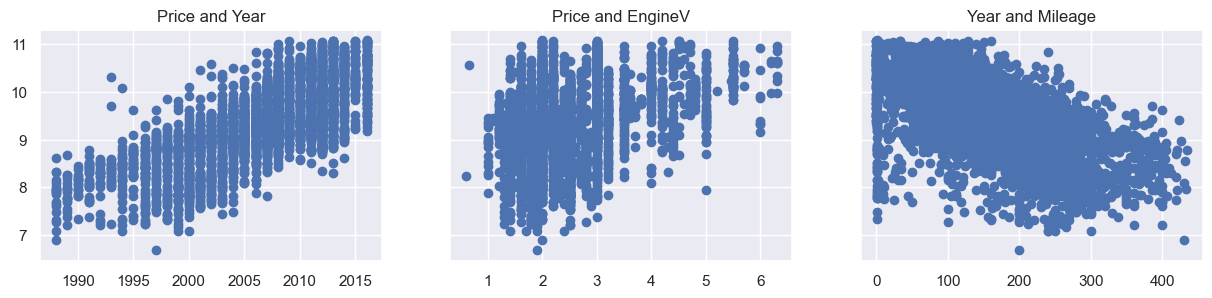

In [109]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(cleaned_data['Year'], cleaned_data['Log Price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['EngineV'], cleaned_data['Log Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cleaned_data['Mileage'], cleaned_data['Log Price'])
ax3.set_title('Year and Mileage')

plt.show()

In [110]:
cleaned_data.drop(['Price'], axis=1, inplace=True)

In [112]:
variables = cleaned_data[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [114]:
vif

,VIF,Features
0,10.355853,Year
1,4.233150,Mileage
2,7.882953,EngineV


In [115]:
cleaned_data.drop(['Year'], axis=1, inplace=True)

In [117]:
data_wdummies = pd.get_dummies(cleaned_data, drop_first=True)
data_wdummies.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [120]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [122]:
data_preprocessed = data_wdummies[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [123]:
targets = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis=1)

In [124]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [126]:
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
y_hat = reg.predict(x_train)

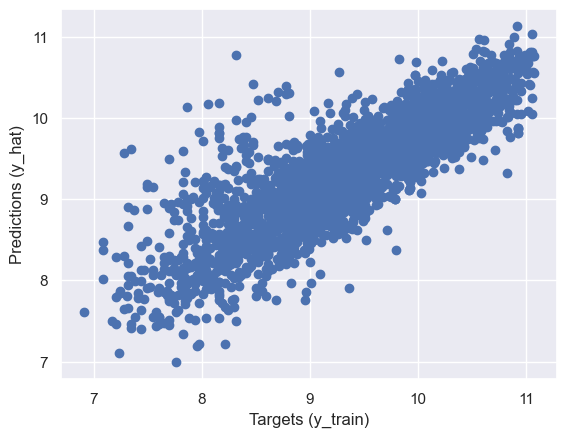

In [131]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=12)
plt.ylabel('Predictions (y_hat)', size=12)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

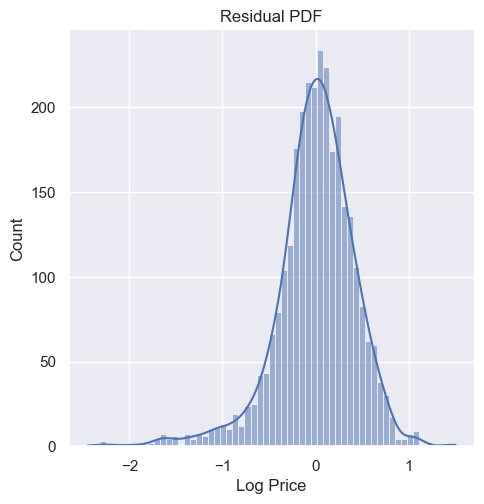

In [134]:
sns.displot(y_train - y_hat, kde=True)
plt.title('Residual PDF', size=12)
plt.show()

In [136]:
reg.score(x_train, y_train)

0.711525231548926

In [138]:
reg.intercept_

np.float64(9.331664190882716)

In [140]:
reg.coef_

array([-0.40470699,  0.19250822,  0.01419675,  0.00099847, -0.12463293,
       -0.16923826, -0.04655678, -0.07435752, -0.15357583, -0.09896301,
       -0.19852157, -0.12876875, -0.16972289, -0.1117316 , -0.02137836,
       -0.13111403,  0.31651799])

In [144]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,Mileage,-0.404707
1,EngineV,0.192508
2,Brand_BMW,0.014197
3,Brand_Mercedes-Benz,0.000998
4,Brand_Mitsubishi,-0.124633
5,Brand_Renault,-0.169238
6,Brand_Toyota,-0.046557
7,Brand_Volkswagen,-0.074358
8,Body_hatch,-0.153576
9,Body_other,-0.098963


In [145]:
y_hat_test = reg.predict(x_test)

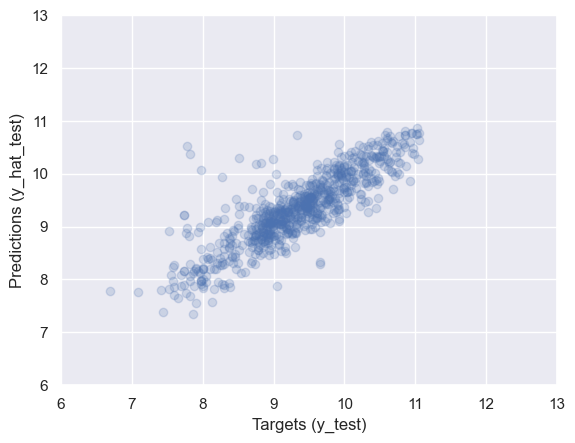

In [148]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=12)
plt.ylabel('Predictions (y_hat_test)', size=12)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [150]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,7936.501618,2400.0
1,9743.230798,11990.0
2,2729.581503,2900.0
3,11340.182030,17595.0
4,13622.950726,17800.0
...,...,...
737,12418.007751,17500.0
738,7799.993544,7700.0
739,10307.640297,7300.0
740,11453.635372,6299.0


In [154]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['%Difference'] = abs(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,%Difference
0,7936.501618,2400.0,-5536.501618,230.687567
1,9743.230798,11990.0,2246.769202,18.738692
2,2729.581503,2900.0,170.418497,5.876500
3,11340.182030,17595.0,6254.817970,35.548838
4,13622.950726,17800.0,4177.049274,23.466569
...,...,...,...,...
737,12418.007751,17500.0,5081.992249,29.039956
738,7799.993544,7700.0,-99.993544,1.298617
739,10307.640297,7300.0,-3007.640297,41.200552
740,11453.635372,6299.0,-5154.635372,81.832598


In [155]:
df_pf.describe(include='all')

,Predictions,Target,Residual,%Difference
count,742.000000,742.000000,742.000000,742.000000
mean,14165.464992,15190.788598,1025.323606,35.637016
std,9832.794301,12190.134262,6695.417884,84.751706
min,1542.557400,800.000000,-34651.230331,0.025721
25%,7414.541623,7025.000000,-1666.582334,9.421558
50%,11200.890332,11400.000000,70.553205,21.676767
75%,18261.113218,19773.020000,2840.338124,36.061920
max,52549.950879,63333.000000,36459.481209,1441.348013
